사전준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
def show_images(dataset, label, nrow, ncol):
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*2, nrow*2))
    ax = axes.ravel()

    xlabels = label[:nrow*ncol] # [0:nrow*ncol] 과 같겠지?

    for i in range(nrow*ncol):
        ax[i].imshow(dataset[i], cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

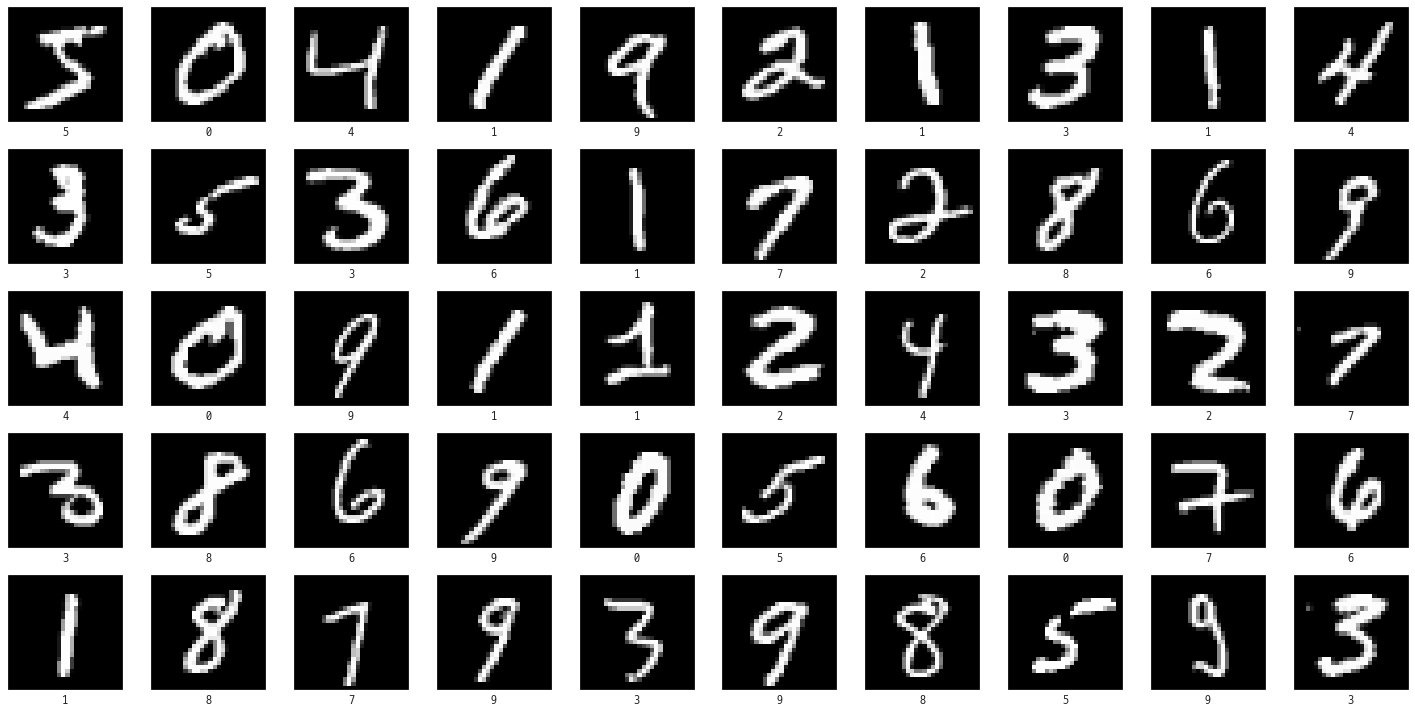

In [6]:
show_images(train_input, train_target, 5, 10)

In [9]:
model = keras.Sequential(name = 'ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))


In [10]:
# 이번엔 그 255로 나누기가 없지?
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-ann-model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target), batch_size=100,
callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
597/600 [============================>.] - ETA: 0s - loss: 4.1442 - accuracy: 0.9164
Epoch 1: val_loss improved from inf to 0.54658, saving model to best-ann-model.h5
600/600 [==============================] - 6s 9ms/step - loss: 4.1275 - accuracy: 0.9165 - val_loss: 0.5466 - val_accuracy: 0.9505
Epoch 2/20
595/600 [============================>.] - ETA: 0s - loss: 0.3568 - accuracy: 0.9591
Epoch 2: val_loss improved from 0.54658 to 0.45744, saving model to best-ann-model.h5
600/600 [==============================] - 5s 9ms/step - loss: 0.3554 - accuracy: 0.9592 - val_loss: 0.4574 - val_accuracy: 0.9479
Epoch 3/20
598/600 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9675
Epoch 3: val_loss improved from 0.45744 to 0.36069, saving model to best-ann-model.h5
600/600 [==============================] - 5s 9ms/step - loss: 0.2267 - accuracy: 0.9675 - val_loss: 0.3607 - val_accuracy: 0.9608
Epoch 4/20
600/600 [==============================] - ETA: 0s - l

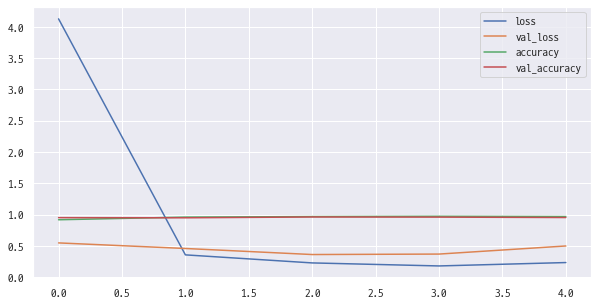

In [11]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(10, 5))

for each in plot_target:
    plt.plot(history.history[each], label=each)

plt.legend()
plt.show()

In [13]:
pred_result = model.predict(test_input)

313/313 [==============================] - 1s 3ms/step


In [14]:
pred_labels = np.argmax(pred_result, axis=1)
pred_labels[:10]


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

#### 예측 실패한 이미지 파악

In [15]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)


392

In [17]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)


16

In [16]:
# 예측 실패한 이미지 확인

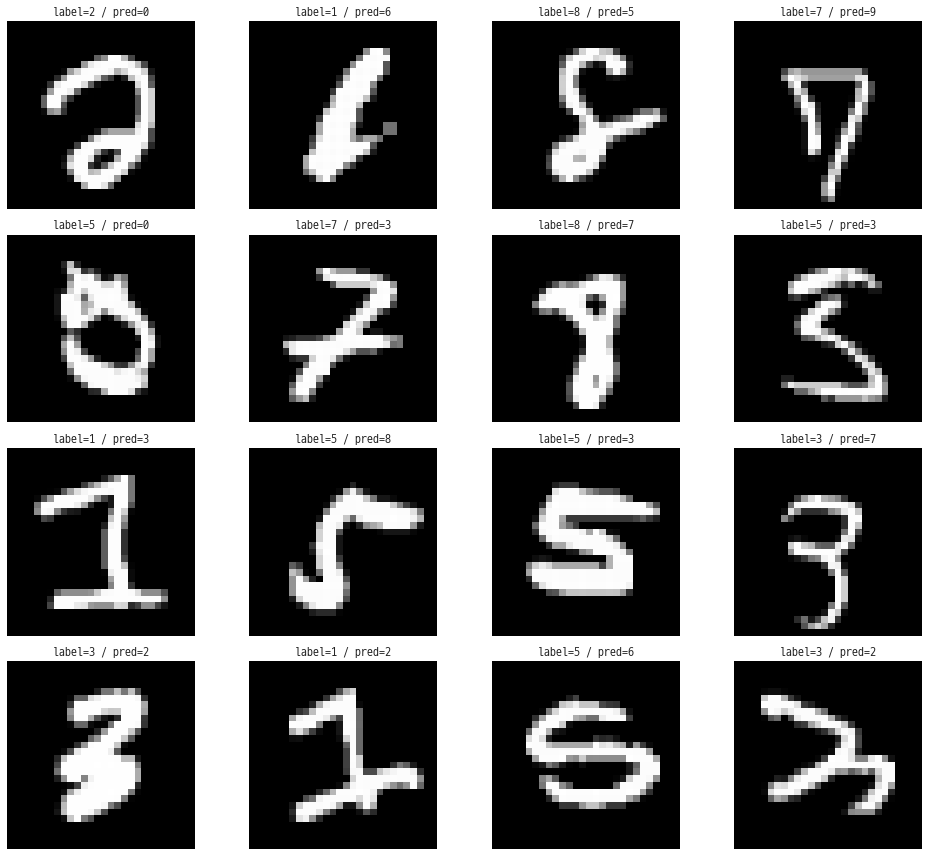

In [23]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(test_input[n].reshape(28,28), cmap='gray', interpolation='nearest') # interpolation = 'r' : 보간법
    plt.title(f'label={test_target[n]} / pred={pred_labels[n]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-ann-model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, validation_data=(test_input, test_target), batch_size=100,
callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 0.5434 - accuracy: 0.9571
Epoch 1: val_loss improved from inf to 0.38046, saving model to best-ann-model.h5
600/600 [==============================] - 5s 8ms/step - loss: 0.5434 - accuracy: 0.9571 - val_loss: 0.3805 - val_accuracy: 0.9563
Epoch 2/20
593/600 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.9684
Epoch 2: val_loss did not improve from 0.38046
600/600 [==============================] - 5s 8ms/step - loss: 0.2257 - accuracy: 0.9683 - val_loss: 0.3966 - val_accuracy: 0.9519
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.1982 - accuracy: 0.9701
Epoch 3: val_loss did not improve from 0.38046
600/600 [==============================] - 5s 8ms/step - loss: 0.1982 - accuracy: 0.9701 - val_loss: 0.3840 - val_accuracy: 0.9585


물론 레이어 노드 갯수가 많아지면 정확도가 올라가긴 하는데 어디까지 정확도를 올릴 것 인가?